Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


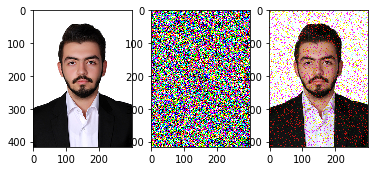

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from random import sample 

def noise_freq_2d_im(input_sig, percent=10):
    freq_sig=np.fft.rfft2(input_sig)
    max_value=freq_sig.max()
    if input_sig.max()>1:
        rgb_map_flag=1
    else:
        rgb_map_flag=0

    rand_index=sample(range(freq_sig.shape[0]*freq_sig.shape[1]),int(((freq_sig.shape[0]*freq_sig.shape[1])*percent)/100))
    freq_sig.flat[rand_index]=max_value*np.random.rand()  
    output_sig=np.fft.irfft2(freq_sig)
    
    if rgb_map_flag==1:
        output_sig.astype(int)
    return output_sig

def noise_space_2d_im(input_sig, percent):
    output_sig=input_sig
    max_value=output_sig.max()
    
    if input_sig.max()>1:
        rgb_map_flag=1
    else:
        rgb_map_flag=0
        
    rand_index=sample(range(input_sig.shape[0]*input_sig.shape[1]),int(((input_sig.shape[0]*input_sig.shape[1])*percent)/100))
    output_sig.flat[rand_index]=max_value*np.random.rand()
    if rgb_map_flag==1:
        output_sig.astype(int)
    return output_sig
   
im=plt.imread('avt.png')
plt.subplot(131)
plt.imshow(im)

newimage=np.copy(im)
newimage=newimage[:,:,:3]
newimage[:,:,1]=noise_freq_2d_im(input_sig=newimage[:,:,1],percent=2)
newimage[:,:,2]=noise_freq_2d_im(input_sig=newimage[:,:,2],percent=2)
newimage[:,:,0]=noise_freq_2d_im(input_sig=newimage[:,:,0],percent=2)
plt.subplot(132)
plt.imshow(newimage)

newimage2=np.copy(im)
newimage2=newimage2[:,:,:3]
newimage2[:,:,1]=noise_space_2d_im(input_sig=newimage2[:,:,1],percent=10)
newimage2[:,:,2]=noise_space_2d_im(input_sig=newimage2[:,:,2],percent=10)
newimage2[:,:,0]=noise_space_2d_im(input_sig=newimage2[:,:,0],percent=10)
plt.subplot(133)
plt.imshow(newimage2)